In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [49]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [50]:
X = X/255.0

In [51]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (X.shape[1:])))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(12))
model.add(Activation("softmax"))

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [53]:
history = model.fit(X, y, batch_size=32, epochs=15, validation_split=0.1)

Train on 3733 samples, validate on 415 samples
Epoch 1/15
3733/3733 [==============================] - 10s 3ms/sample - loss: 2.1584 - accuracy: 0.2373 - val_loss: 1.8867 - val_accuracy: 0.3229
Epoch 2/15
3733/3733 [==============================] - 9s 3ms/sample - loss: 1.7781 - accuracy: 0.3710 - val_loss: 1.6921 - val_accuracy: 0.3880
Epoch 3/15
3733/3733 [==============================] - 10s 3ms/sample - loss: 1.5924 - accuracy: 0.4474 - val_loss: 1.5690 - val_accuracy: 0.4410
Epoch 4/15
3733/3733 [==============================] - 10s 3ms/sample - loss: 1.3916 - accuracy: 0.5221 - val_loss: 1.3392 - val_accuracy: 0.5566
Epoch 5/15
3733/3733 [==============================] - 10s 3ms/sample - loss: 1.1861 - accuracy: 0.5992 - val_loss: 1.3405 - val_accuracy: 0.5301
Epoch 6/15
3733/3733 [==============================] - 10s 3ms/sample - loss: 1.0282 - accuracy: 0.6518 - val_loss: 1.1241 - val_accuracy: 0.6193
Epoch 7/15
3733/3733 [==============================] - 10s 3ms/sample -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


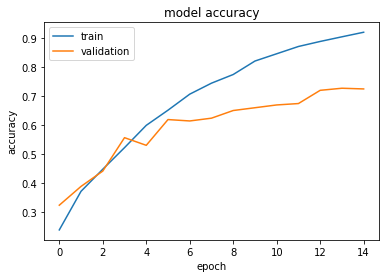

In [54]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

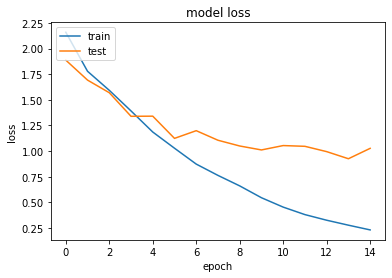

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
model_json = model.to_json()
with open("modelColor.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("modelColor.h5")
print("Saved model to disk")

model.save('CNN.modelColor')

Saved model to disk
INFO:tensorflow:Assets written to: CNN.modelColor\assets


In [57]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [58]:
tflite_model

b'\x1c\x00\x00\x00TFL3\x00\x00\x12\x00\x1c\x00\x04\x00\x08\x00\x0c\x00\x10\x00\x14\x00\x00\x00\x18\x00\x12\x00\x00\x00\x03\x00\x00\x00\xd0\x98\x16\x00\x10\x00\x00\x00\x1c\x00\x00\x00,\x00\x00\x00\x0c\x00\x00\x00\x01\x00\x00\x00\\\x01\x00\x00\x01\x00\x00\x00$\x01\x00\x00\x0f\x00\x00\x00TOCO Converted.\x00\x19\x00\x00\x00\xf8\x00\x00\x00\xf0\x00\x00\x00\xe8\x00\x00\x00\xe0\x00\x00\x00\xd4\x00\x00\x00\xc8\x00\x00\x00\xbc\x00\x00\x00\xb4\x00\x00\x00\xac\x00\x00\x00\xa4\x00\x00\x00\x9c\x00\x00\x00\x94\x00\x00\x00\x88\x00\x00\x00\x80\x00\x00\x00x\x00\x00\x00l\x00\x00\x00`\x00\x00\x00T\x00\x00\x00L\x00\x00\x00@\x00\x00\x004\x00\x00\x00(\x00\x00\x00\x1c\x00\x00\x00\x10\x00\x00\x00\x04\x00\x00\x00\x86j\xe9\xff\x94\x00\x00\x00\x8ej\xe9\xff\x94\x01\x00\x00\x96j\xe9\xff\x08\x02\x00\x00\x9ej\xe9\xffd\x04\x00\x00\xa6j\xe9\xff\xc0D\x02\x00\xaej\xe9\xff\x1ce\x03\x00pj\xe9\xff\xbaj\xe9\xff\x10s\x03\x00\xc2j\xe9\xffTu\x03\x00\xcaj\xe9\xff\xb0v\x03\x00\x8cj\xe9\xff\x90j\xe9\xff\xdaj\xe9\xff\x94w\x04\x00\

In [60]:
open("model.tflite", "wb").write(tflite_model)

1481056